## Boston House Prices

***

### Introduction

This Notebook is essetially broken into 3 sections
+ Descriptive Statistics
    + This shows al a top level a summary of the inputs and highlights the key vriables
    + Visualisation through Histograms, Scatterplot of these key vraibles with obvious regression to Price
    + Correlation between the inputs.
    
    
+ A comparison of House Prices on Charles River and those not
    + Most significantly a t-test to determine the acceptance of Null Hypothesis that the means of the House Price Populations are closely aligned. 
    
    
+ A walkthrough the Neural network creation and the steps undertaken to drive a continual improvement in the predictions
    + House Price Prediction set out in a number of phases..
    + Decided on the inputs to select, the model to use, the train/test splits.
    + Most importantly what can we do to influence the predictor - layer/ input selection,Preprocessing, Scaling, Whitening 

### Dataset Sources

https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

https://www.kaggle.com/prasadperera/the-boston-housing-dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. There are 506 line items and 13 attributes (excluding price). The following describes the dataset columns:

+ CRIM - per capita crime rate by town
+ ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
+ INDUS - proportion of non-retail business acres per town.
+ CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
+ NOX - nitric oxides concentration (parts per 10 million)
+ RM - average number of rooms per dwelling
+ AGE - proportion of owner-occupied units built prior to 1940
+ DIS - weighted distances to five Boston employment centres
+ RAD - index of accessibility to radial highways
+ TAX - full-value property-tax rate per 10,000
+ PTRATIO pupil-teacher ratio by town.
+ B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
+ LSTAT - % lower status of the population.
+ MEDV - Median value of owner-occupied homes in 1000's.


In [3]:
# import libraries that will be used in completing this assignment
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import scipy.stats as ss # used for Inferential Stats - e.g - T-test
import pandas as pd
import seaborn as sns #plotting#
import keras as kr # will be using Keras to create a Neural Network and use as prediction tool
%matplotlib inline


Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

The Boston House prices dataset is imported directly from sklearn library; referenced in multiple locations as a source, and converted to a pandas dataframe for ease of analysis.
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

In [7]:
# importing the Boston House Prices data set from the sklearn library
from sklearn.datasets import load_boston
boston_dataset = load_boston() #storing Boston House prices as a variable boston_dataset (a dictionary)

In [8]:
#setting up the pandas dataframe to hold our dataset - making it easier to interogate the dataset
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

+ data: contains the information for various houses
+ target: prices of the house
+ feature_names: names of the features
+ DESCR: describes the dataset

### Descriptive Statistics

The dataset shows 506 line items, 13 columns. The prices column does not appear as this is in the "target" column, needs to be added to the dataset as this is obviously the most important data element! For transparency,although basic aand widely available https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155 is referenced to get this inital dataset into the dataframe.

In [11]:
df.shape

(506, 13)

In [12]:
df['MEDV'] = boston_dataset.target

In [13]:
#a view of the first 5 row relating to each header
df.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


MEDV - (Median value of owner-occupied homes in $1000's) is the key value in the dataset; against which other variablesa re to be measured against for "best fit". The aim here is to explore the dataset for close alignment of varaibles which can demonstrate a relationship to the House price.

In [14]:
# to view the the key measures associated to each variable - 506 of each (nothing missing. all aligned)
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
df.MEDV.describe() # summary of house prices in particular

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64


## Visualising the Dataset


### Histograms (Replicated in Appendix 1)

From the dataset, Histograms are pointing to a subset of variables which display a relatively strong normal distribution - namely the MEDV, RM and LSTAT. These three alone also raise a dilemma in themselves. There would be a Normal ditribution on MEDV (Prices) if not for the 16 vlues at 50. This of inself raises the question of Outliers and should we exclude them from future analysis...from various reading it is generally not recommended to exclude outliers from the dataset unlees there are obvious errors (e.g. a negative age)... will deal with that dilemma later as not overly important at Descriptive stage.

While only a minority of the dataset show anything resembling a normal distribution (MEDV, RM, LSTAT), they are also heavily shewed in a particular direction. MEDV is the house price variable we are working to create a model to predict. Having shewed data also has implications in the analysis/prediction stage.

Here distplot is able to combine a histogram with a kernel density estimation (KDE) plot (it looks like a smoothed histogram) into a single plot. https://seaborn.pydata.org/generated/seaborn.distplot.html

In [16]:
# the dataframe with 16 outlier MEDV (price) values excluded is called df2 ...finally decided to exclude Outliers from Predictor.
df2 = (df[df.MEDV != 50])

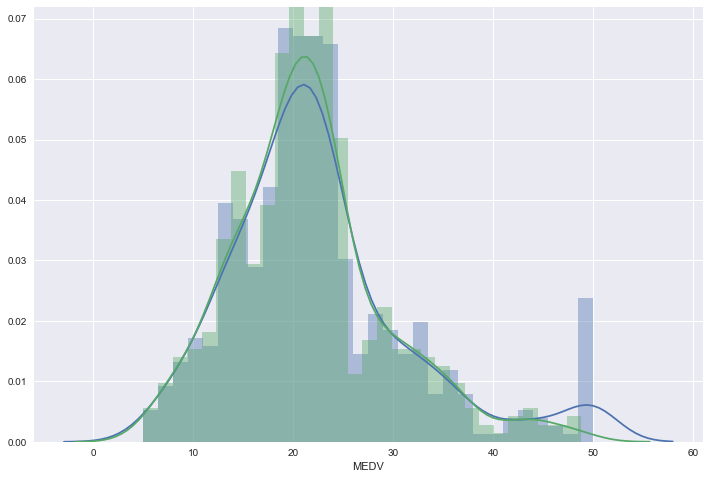

In [17]:
# Just to show a comparison of the means etc. when the oultier Prices are ommitted and their relative impact..
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(df['MEDV'], bins=30)
sns.distplot(df2['MEDV'], bins=30)
plt.show();

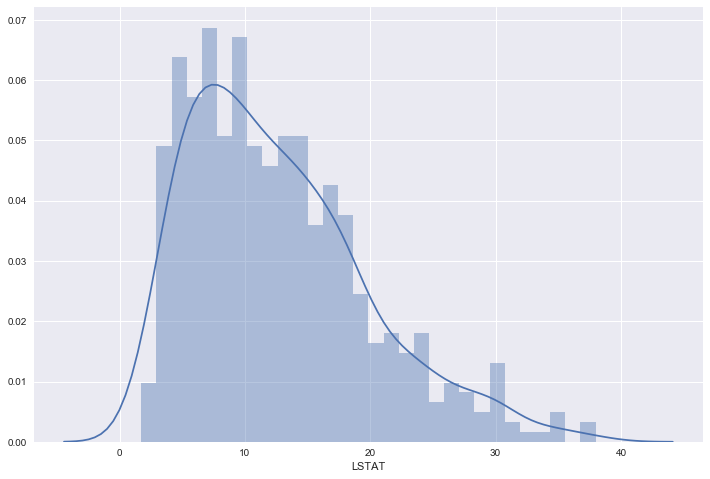

In [12]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(df['LSTAT'], bins=30)
plt.show();

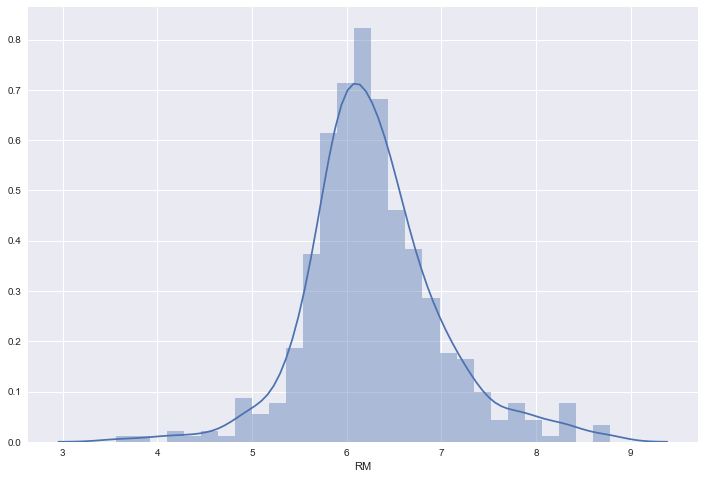

In [13]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(df['RM'])
plt.show();

## Scatterplots
Given that the Histograms display heavily skewed data for most variables the next step is to examine the relationship between those variables that have reasonably normal curves against MEDV - The Price we ultimately want to see the correlations to.


Note: I will need to revisit the Shewed data later and also somewhat concerned at the outlier MEDV at 50.

Also of note as called out are the number of rooms which unsurprisingly show a positive relationship to price, whereas social class/status shows a downward trajectory.

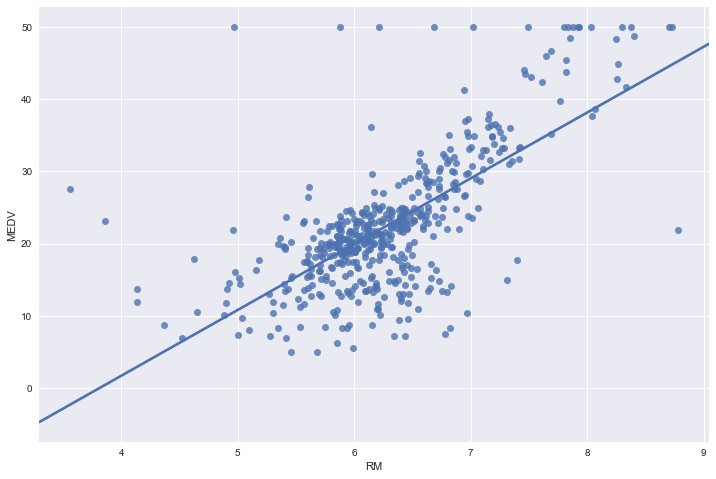

In [14]:
# Adapted from http://seaborn.pydata.org/generated/seaborn.regplot.html
# The confidence interval is estimated using a bootstrap; for large datasets, it may be advisable to avoid that computation by setting this parameter to None.

sns.set(rc={'figure.figsize':(12,8)})
sns.regplot(x='RM', y='MEDV',data=df, ci=None)  

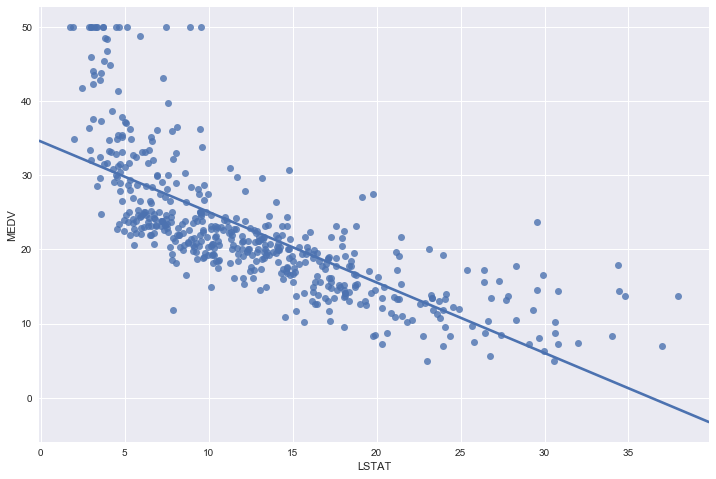

In [15]:
sns.set(rc={'figure.figsize':(12,8)})
sns.regplot(x='LSTAT', y='MEDV',data=df, ci=None)

The line of best fit is calculated by minimizing the ordinary least squares error function, something Seaborn does automatically when we call the regplot function https://subscription.packtpub.com/book/programming/9781789804744/1/ch01lvl1sec11/our-first-analysis-the-boston-housing-dataset

### Correlation 
Correlation is a statistical technique that can show whether and how strongly pairs of variables are related...Correlation works for quantifiable data in which numbers are meaningful, usually quantities of some sort.

The main result of a correlation is called the **correlation coefficient (or "r")**. It ranges from -1.0 to +1.0. The closer r is to +1 or -1, the more closely the two variables are related.

If r is close to 0, it means there is no relationship between the variables. If r is positive, it means that as one variable gets larger the other gets larger. If r is negative it means that as one gets larger, the other gets smaller (often called an "inverse" correlation). https://www.surveysystem.com/correlation.htm. 

In short
1 - Positively correlated
-1 - Negatively correlated.
0 - Not correlated.

https://pythonfordatascience.org/correlation-python/


In [16]:
 df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


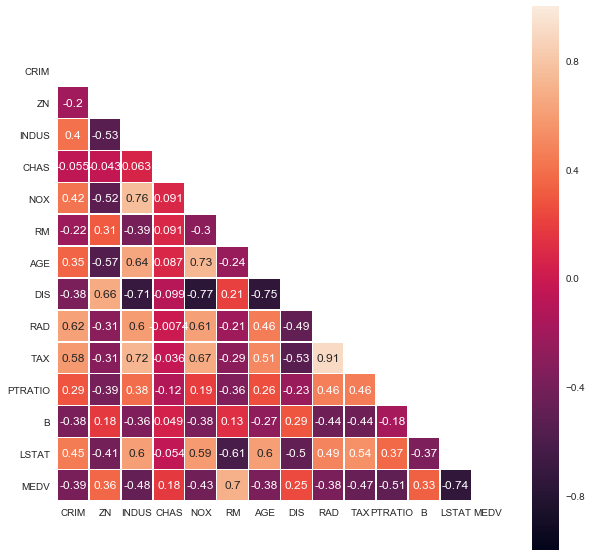

In [17]:
    # Adapted from https://seaborn.pydata.org/generated/seaborn.heatmap.html
    
     
    plt.figure(figsize=(10, 10))
     #ax = sns.heatmap(df.corr())
    mask = np.zeros_like(df.corr())
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        ax = sns.heatmap(df.corr(), mask=mask,linewidths=.5, vmin=-1,vmax=1, square=True,annot=True)
       

We want to see (in particular) the features the dictate what is driving the MEDV. The correlation matrix measures the linear relationships between the variables... shown in the table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. 

There are some other noteworthy points of interest in the table - namely between INDUS and NOX at .76... a clear link between pollution and Industrial activity?

We can clearly see that ZN,RM, and B have positive correlation with MEDV; and LSTAT has a paticularly strong negative correlation. PTRATIO is also significant. Through a visual review of the scatterplot some variables have been discarded as there does not appear to be a significant relationship between the datasets.

The most striking VISUAL relationships between Price and other variables look like LSTAT (downwards curve), RM almost linear with some outliers, NOX concentrated at lower prices?

https://pythonfordatascience.org/correlation-python/ suggests the following assumptions for scores

|  r value | Strength|
|:--------------|----------------:|
| 0.0 - 0.2    | Weak correlation    |
| 0.3 - 0.6    | Moderate correlation|
| 0.7 - 1      | Strong correlation     |

***

## An analysis/comparison of median house prices between houses that are along the Charles river and those that aren’t using Inferential Statistics...

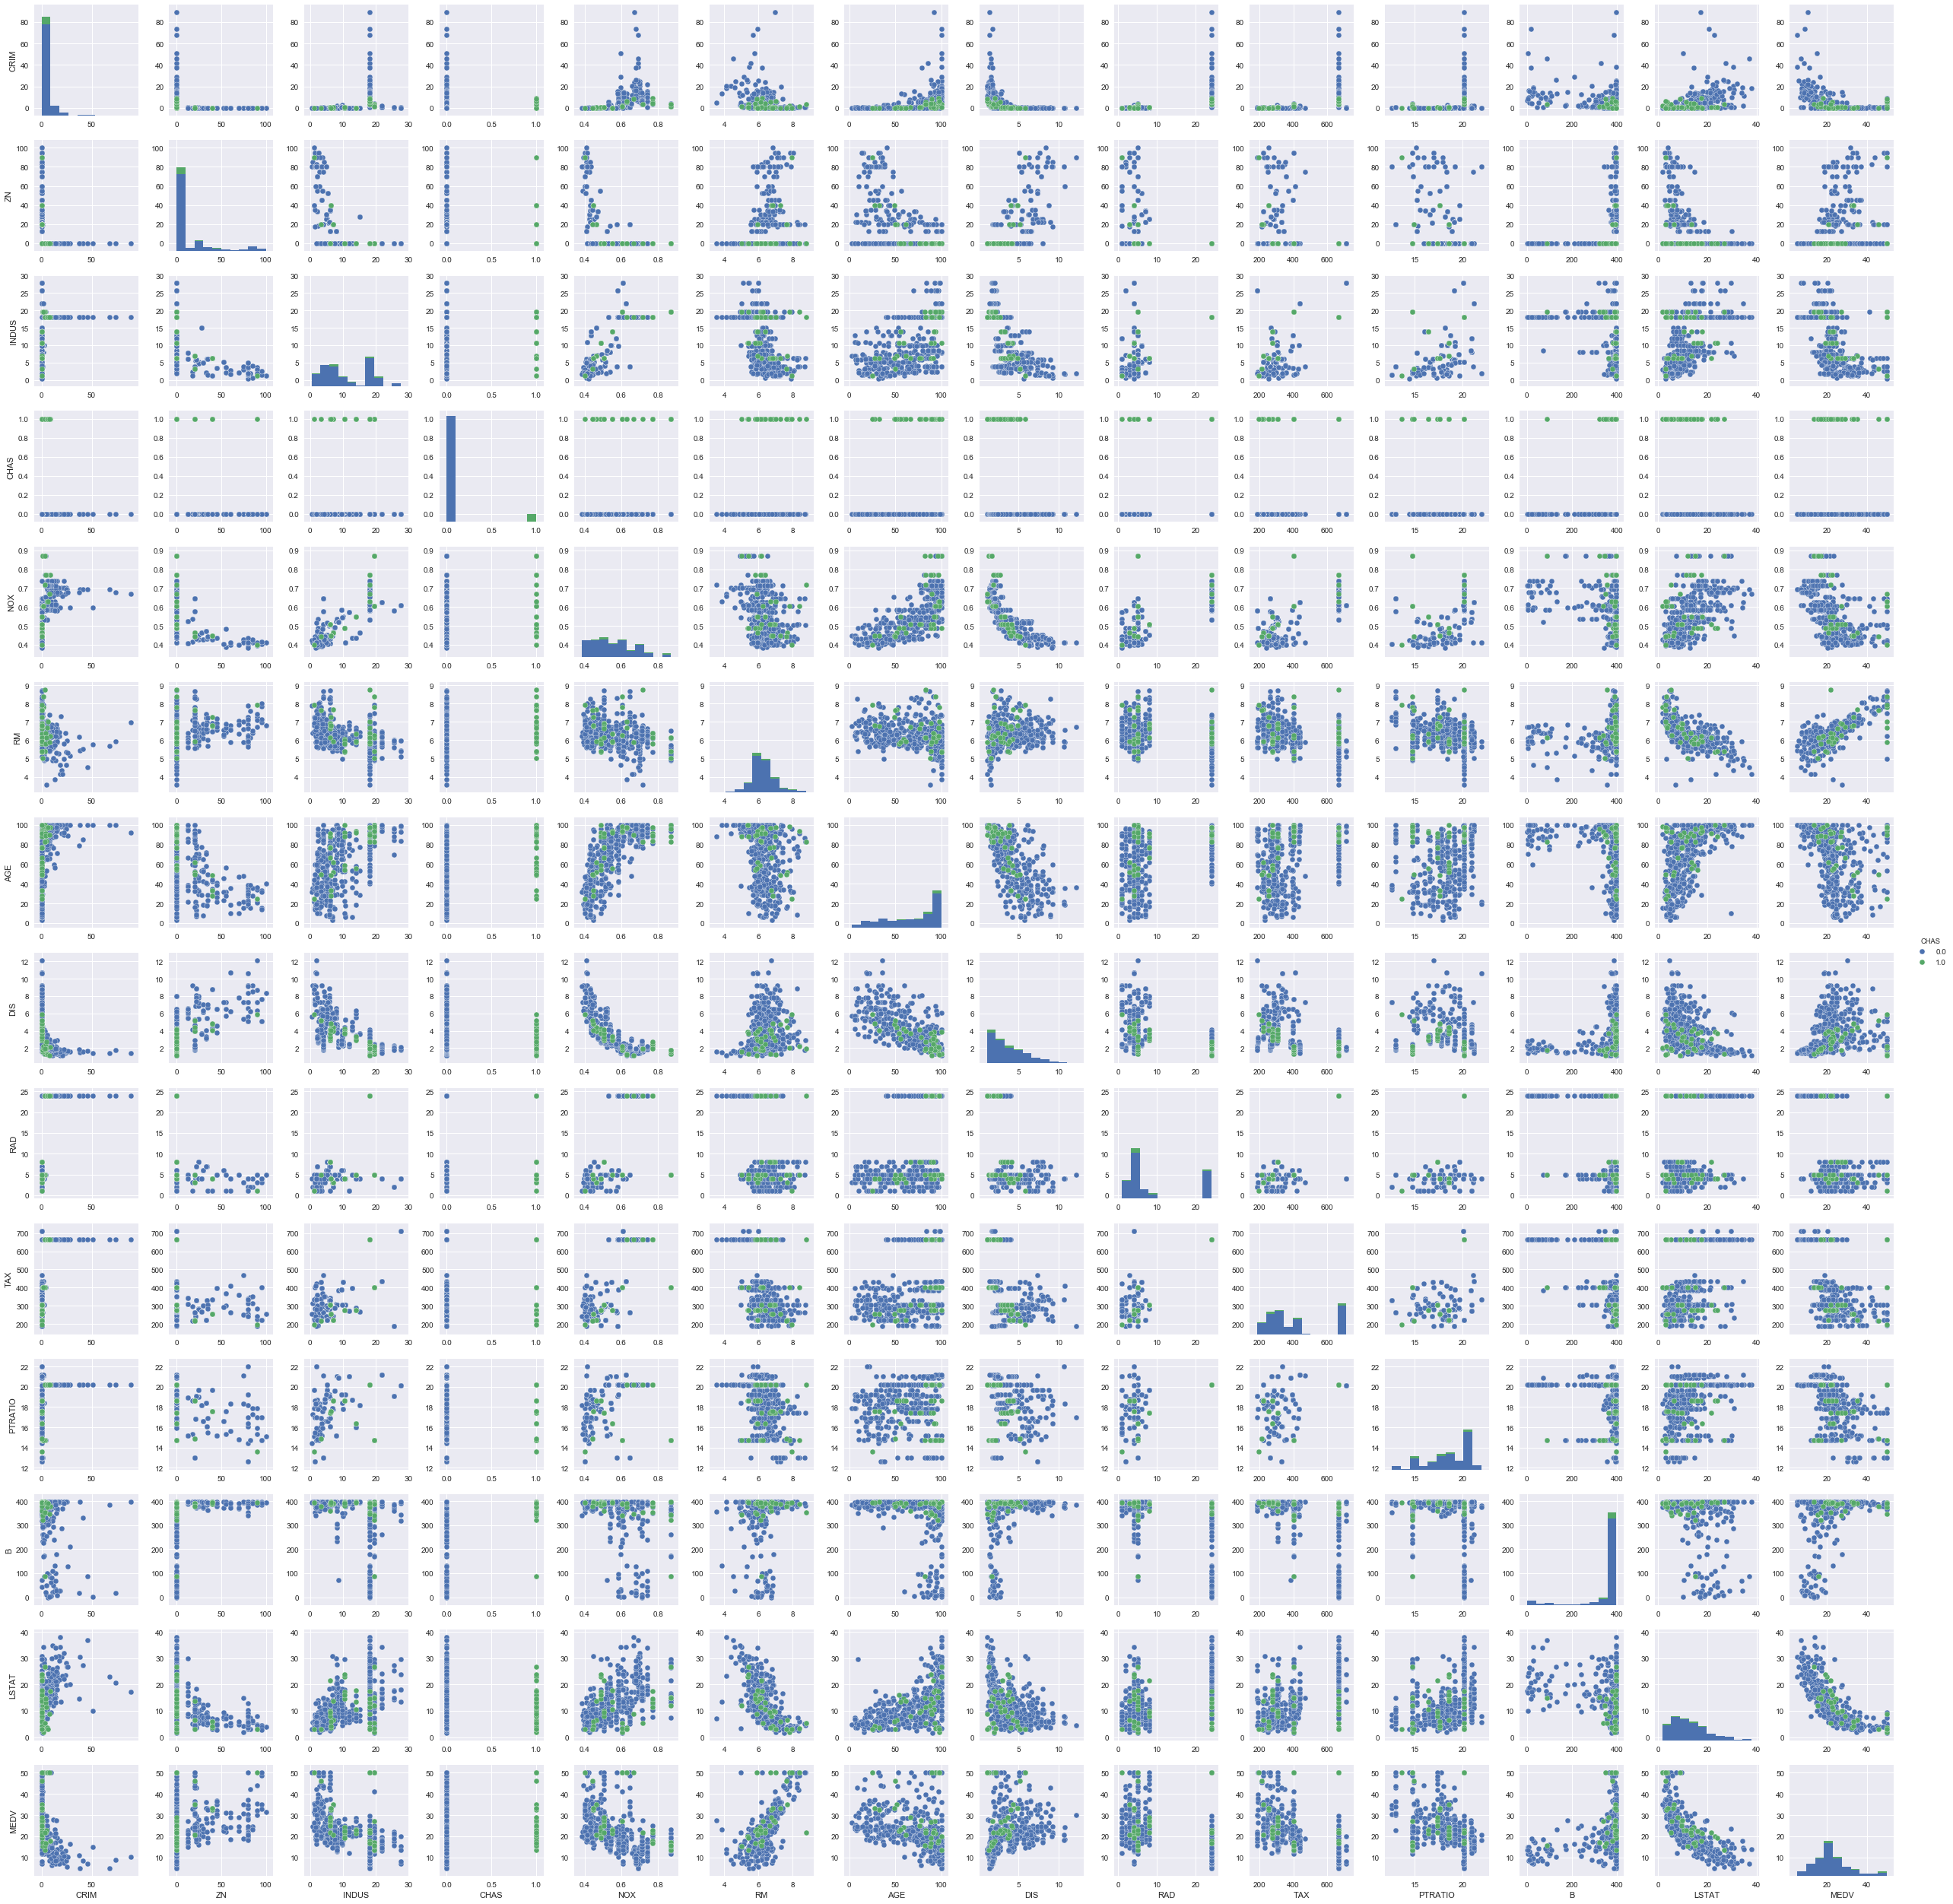

In [18]:
sns.pairplot(df, hue = "CHAS")

"Inferential statistics: statistics used to interpret the meaning of descriptive statistics... " https://uk.sagepub.com/sites/default/files/upm-binaries/40006_Chapter1.pdf

The key in Inferential Statistics is that we need to generalize for the Population based on a sample of data.

The primary tools to be used here will be T-Test and ANOVA. Python provides a number of packages to quickly calculate the variances in Means between the two samples.

Here the objective is the compare/contrast House price trends in Boston based on their proximity to the Charles river. 

In [19]:
df2['MEDV'].groupby([df2['CHAS']]).describe() #summary of house prices by Charles v Non Charles 
# CHAS = 1 are the houses by the Charles river.

,count,mean,std,min,25%,50%,75%,max
CHAS,,,,,,,,
0.0,461.0,21.488503,7.898848,5.0,16.5,20.6,24.5,48.8
1.0,29.0,23.979310,7.024161,13.4,20.0,22.4,27.0,46.0


**For every band from mean /min / max the house prices allow the Charles river are generally higher. (Apart for those "outliers" at the 50!) **

## T- Test

To do a deeper dive into the dataset we measure further and begin to use inferential statistics to determine a hypothesis for a poplulation based on measures of sample data. The independent t-test, is an inferential statistical test that determines whether there is a statistically significant difference between the means in two unrelated groups.There are 6 assumptions which must be met before the t-test is see as an approprite measure to test the Hypothesis as called out by Laerd Statistics. https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php

In [20]:
# Separating out Houses by the River from not by the river...
river= df[df['CHAS']== 1]['MEDV'] # houses by the river
nonriver=df[df['CHAS']== 0]['MEDV'] #house not by the river.

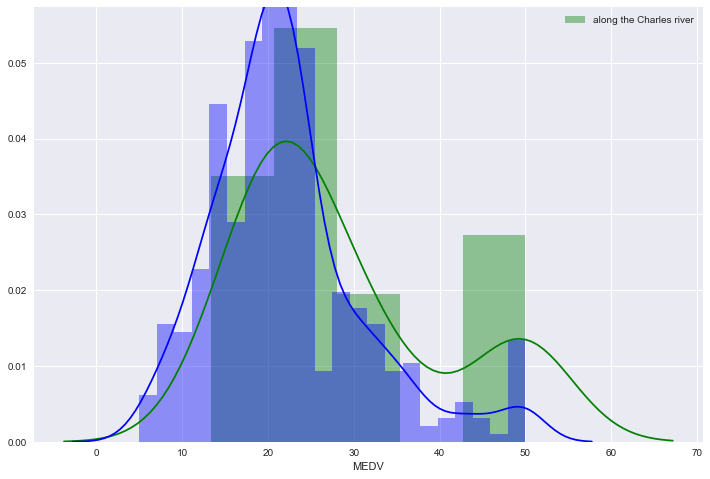

In [21]:
sns.distplot(river, color="g",label= "along the Charles river")
sns.distplot(nonriver, color="b")
plt.legend()

In [22]:
# t-test to compare the`means of 2 data samples (Independent T-Test)
ss.ttest_ind(river,nonriver)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

The t-test returns 2 data measures

 - T-Statistic
 The test statistic is a t statistic (t) defined by the following equation.
 
$$t = [ (x_{1} - x_{2}) - d ] / SE$$

where x<sub>1</sub> is the mean of sample 1, x<sub>2</sub> is the mean of sample 2, d is the hypothesized difference between population means, and SE is the standard error.

- Standard error. (for the sake of completeness)
Compute the standard error (SE) of the sampling distribution.

$$ SE = sqrt[ (s_{1}^{2}/n_{1}) + (s_{2}^{2}/n_{2}) ] $$


Formulae copied from https://stattrek.com/hypothesis-test/difference-in-means.aspx

 
 - p-value
The degree of variance used to reject a hypothesis varies (1% to 10% tpyically), but if the p-value is less than the threshold then the Hypothesis is rejected.



### The Key Point to Note in our test

based on the p-value above, i.e. (7.39062317e-05), **we reject the null hypothesis** that the population means from the two unrelated groups are equal; the probability is the means of the population are NOT equal as the P-value is less than the significance level.


# House Price Prediction

Previously through the Descripive and Inferential statistics etc we have identified the most likely variables that should help in the prediction phase of the exercise. In order to predict the House Prices (MEDV) the following variables WOULD BE selected: LSTAT (downwards curve), RM almost linear with some outliers, NOX concentrated at lower prices.

However,now the power of Keras comes into play as we use the actuals as inputs to create a Neural Network. 
I will use all the fields as inputs.

In [189]:
#importing Keras
import keras as kr
from sklearn import preprocessing

## Setting Inputs to the Model

In [548]:
#all of them for now!
inputs=df2[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','PTRATIO','B','LSTAT','TAX']]


## Setting the Output of the Model (Price aka 'MEDV')

In [549]:
output=df2['MEDV']


In [550]:
# create the Neural Network
m= kr.models.Sequential()

In [557]:
# adding layers
m.add(kr.layers.Dense(30,input_dim=13,kernel_initializer='normal',activation="relu"))
m.add(kr.layers.Dense(9,input_dim=9,activation="linear"))
m.add(kr.layers.Dense(12,input_dim=9,activation="sigmoid"))
m.add(kr.layers.Dense(6,input_dim=6,activation="linear"))

#the output
m.add(kr.layers.Dense(1,kernel_initializer='normal',activation="linear"))

# compile tells keras to create the network based on the inpts
m.compile(loss="mean_squared_error", optimizer='adam')

## Split

In [558]:
# For splitting into training and test sets.
import sklearn.model_selection as mod


In [559]:
# Split the inputs and outputs into training and test sets.
inputs_train, inputs_test, output_train, output_test = mod.train_test_split(inputs, output, test_size=0.2)

In [560]:
inputs_test.iloc[0]

CRIM         7.40389
ZN           0.00000
INDUS       18.10000
CHAS         0.00000
NOX          0.59700
RM           5.61700
AGE         97.90000
DIS          1.45470
RAD         24.00000
PTRATIO     20.20000
B          314.64000
LSTAT       26.40000
TAX        666.00000
Name: 408, dtype: float64

In [561]:
m.fit(inputs,output,epochs=100, batch_size=10)

Epoch 1/100
490/490 [==============================] - 22s 44ms/step - loss: 516.6091
Epoch 2/100
490/490 [==============================] - 1s 2ms/step - loss: 479.8477
Epoch 3/100
490/490 [==============================] - 1s 1ms/step - loss: 423.1152
Epoch 4/100
490/490 [==============================] - 1s 2ms/step - loss: 346.5766
Epoch 5/100
490/490 [==============================] - 1s 2ms/step - loss: 258.0863
Epoch 6/100
490/490 [==============================] - 1s 2ms/step - loss: 168.6927
Epoch 7/100
490/490 [==============================] - 1s 1ms/step - loss: 107.3506
Epoch 8/100
490/490 [==============================] - 1s 2ms/step - loss: 77.2690
Epoch 9/100
490/490 [==============================] - 1s 1ms/step - loss: 65.9998
Epoch 10/100
490/490 [==============================] - 1s 2ms/step - loss: 62.7225
Epoch 11/100
490/490 [==============================] - 1s 2ms/step - loss: 62.0323
Epoch 12/100
490/490 [==============================] - 1s 2ms/step - loss: 

In [562]:
m.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_190 (Dense)            (None, 50)                700       
_________________________________________________________________
dense_191 (Dense)            (None, 9)                 459       
_________________________________________________________________
dense_192 (Dense)            (None, 12)                120       
_________________________________________________________________
dense_193 (Dense)            (None, 6)                 78        
_________________________________________________________________
dense_194 (Dense)            (None, 1)                 7         
_________________________________________________________________
dense_195 (Dense)            (None, 30)                60        
_________________________________________________________________
dense_196 (Dense)            (None, 9)               

### Preprocessing note:
After researching the poor results achieved using the full 13 variable input in their original format/state, I have realised that the data need to be cleaned down and preprocesed in order to achieve a more uniform data set.
- Some suggestions recommend doing a log of the values to noramlise the curves - many of the variables show a heavily shewed histogram on inspection

- sklearn offers a function function called the min-max scaler, which scales the dataset so that all the input features lie between 0 and 1 inclusive: this will help to level the range of numbers - and takes out the data set numeric variation we see with ZN, B and Age for example.

Idea for preprocessing using scaler found here.
https://hackernoon.com/build-your-first-neural-network-to-predict-house-prices-with-keras-3fb0839680f4

Other sources reiterate that... "Machine Learning algorithms don’t work so well with processing raw data. Before we can feed such data to an ML algorithm, we must preprocess it. In other words, we must apply some transformations on it. With data preprocessing, we convert raw data into a clean data set". To preprocess data, we will use the library scikit-learn or sklearn in this tutorial.

While there are a number of techniques available to convert data into the specific required format to fit most appropriately with the models, in the case of the Boston House Prices dataset two in particlar seem to be particularly relvent - namely Rescaling and Standardisation.


### To preprocess data, we will use the library scikit-learn or sklearn

**Rescaling:** rescale attributes to possess the same scale. We rescale attributes into the range 0 to 1 and call it normalization. We use the MinMaxScaler class from scikit-learn.This gives us values between 0 and 1. Rescaling data proves of use with neural networks, optimization algorithms and those that use distance measures like k-nearest neighbors and weight inputs like regression.

**Standardizing Data:** we can take attributes with a Gaussian distribution and different means and standard deviations and transform them into a standard Gaussian distribution with a mean of 0 and a standard deviation of 1. For this, we use the StandardScaler class. Taken from https://data-flair.training/blogs/python-ml-data-preprocessing/ 


In [378]:
#importing specific package from sklearn
#from sklearn import preprocessing

In [521]:
#this is the dataframe with MEDV outliers excluded
inputs=df2[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','PTRATIO','B','LSTAT','TAX']]

In [522]:
X= inputs
Y= output

### Rescaling the Inputs

In [523]:
#using the MinMaxScaler to initalise dataset
min_max_scaler = preprocessing.MinMaxScaler()

In [524]:
X_scale = min_max_scaler.fit_transform(X)

In [571]:
X_scale

array([[0.00000000e+00, 1.80000000e-01, 5.81481481e-02, ...,
        1.00000000e+00, 8.33564879e-02, 2.08015267e-01],
       [2.35922539e-04, 0.00000000e+00, 2.34444444e-01, ...,
        1.00000000e+00, 1.98944151e-01, 1.04961832e-01],
       [2.35697744e-04, 0.00000000e+00, 2.34444444e-01, ...,
        9.89737254e-01, 5.69602667e-02, 1.04961832e-01],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.14444444e-01, ...,
        1.00000000e+00, 1.01694915e-01, 1.64122137e-01],
       [1.16072990e-03, 0.00000000e+00, 4.14444444e-01, ...,
        9.91300620e-01, 1.25034732e-01, 1.64122137e-01],
       [4.61841693e-04, 0.00000000e+00, 4.14444444e-01, ...,
        1.00000000e+00, 1.63934426e-01, 1.64122137e-01]])

In [572]:
from sklearn.model_selection import train_test_split

In [573]:
X_train, X_test, Y_train, Y_test = mod.train_test_split(X_scale, Y, test_size=0.2)

In [574]:
X_val, X_test, Y_val, Y_test = mod.train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [575]:
#inputs_train, inputs_test, output_train, output_test = mod.train_test_split(inputs, output, test_size=0.2)

In [576]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(392, 13) (73, 12) (74, 12) (392,) (73,) (74,)


In [577]:
#from keras.models import Sequential
#from keras.layers import Dense

In [578]:
# adding layers
m.add(kr.layers.Dense(130,input_dim=13,kernel_initializer='normal',activation="relu"))
m.add(kr.layers.Dense(9,input_dim=9,activation="linear"))
m.add(kr.layers.Dense(6,input_dim=6,activation="linear"))
m.add(kr.layers.Dense(6,input_dim=3,activation="linear"))

#the output
m.add(kr.layers.Dense(1,kernel_initializer='normal',activation="linear"))

# compile tells keras to create the network based on the inputs
m.compile(loss="mean_squared_error", optimizer='adam')


Adding additional layers to the neural network for our Boston dataset makes a marginal improvement in the performance, from ~16 to 14, but having difficulty improving further below this MSE. Amending the batch size and training set parameters has minimal impact on the end result which is somewhat disappointing at this stage. Additional actions to follow will improve this.

In [579]:
m.fit(X_train,Y_train,epochs=100, batch_size=10)

Epoch 1/100
392/392 [==============================] - 20s 52ms/step - loss: 267.7775
Epoch 2/100
392/392 [==============================] - 1s 2ms/step - loss: 51.0542
Epoch 3/100
392/392 [==============================] - 1s 2ms/step - loss: 32.8038
Epoch 4/100
392/392 [==============================] - 1s 2ms/step - loss: 22.7903
Epoch 5/100
392/392 [==============================] - 1s 2ms/step - loss: 15.9237
Epoch 6/100
392/392 [==============================] - 1s 2ms/step - loss: 12.8386
Epoch 7/100
392/392 [==============================] - 1s 2ms/step - loss: 11.1890
Epoch 8/100
392/392 [==============================] - 1s 2ms/step - loss: 11.4216
Epoch 9/100
392/392 [==============================] - 1s 2ms/step - loss: 10.8024
Epoch 10/100
392/392 [==============================] - 1s 2ms/step - loss: 9.6161
Epoch 11/100
392/392 [==============================] - 1s 2ms/step - loss: 8.7772
Epoch 12/100
392/392 [==============================] - 1s 2ms/step - loss: 10.0190


Initially, MinMaxScaler did not achieve the desired/expected result... loss down to ~13.3, some incremental improvement but still not ideal.This was with 2 layers... and wAs getting NAN on SGD as the optimization algorithm

when I add the third layer, lessening the number of input to each progressive layer on the Scaled dataset, the result improves significantly to ~5-6. Clearly the in increase in neural input drives up the alignment, but at the risk of overtraining.


## Working with Whitening

In [541]:
# Import
import sklearn.decomposition as dec


In [542]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [543]:
# Instantiate
pca = PCA(n_components=13,whiten=True)

# Fit and Apply dimensionality reduction on X
pca.fit(X_train)
X_train_white = pd.DataFrame(pca.transform(X_train), columns=X.columns)


In [567]:
# adding layers
m.add(kr.layers.Dense(150,input_dim=10,kernel_initializer='normal',activation="linear"))
m.add(kr.layers.Dense(6,input_dim=5,activation="linear"))

#the output
m.add(kr.layers.Dense(1,kernel_initializer='normal',activation="linear"))

# compile tells keras to create the network based on the inpts
m.compile(loss="mean_squared_error", optimizer='adam')

In [570]:
m.fit(X_train_white, output_train, epochs=100, batch_size=10)

Epoch 1/100
392/392 [==============================] - 1s 2ms/step - loss: 6.2606
Epoch 2/100
392/392 [==============================] - 1s 2ms/step - loss: 5.6823
Epoch 3/100
392/392 [==============================] - 1s 2ms/step - loss: 5.0088
Epoch 4/100
392/392 [==============================] - 1s 2ms/step - loss: 4.4495
Epoch 5/100
392/392 [==============================] - 1s 2ms/step - loss: 4.6720
Epoch 6/100
392/392 [==============================] - 1s 2ms/step - loss: 5.1913
Epoch 7/100
392/392 [==============================] - 1s 2ms/step - loss: 7.0586
Epoch 8/100
392/392 [==============================] - 1s 2ms/step - loss: 5.5642
Epoch 9/100
392/392 [==============================] - ETA: 0s - loss: 5.564 - 1s 2ms/step - loss: 5.5417
Epoch 10/100
392/392 [==============================] - 1s 2ms/step - loss: 5.2395
Epoch 11/100
392/392 [==============================] - 1s 2ms/step - loss: 4.7861
Epoch 12/100
392/392 [==============================] - 1s 2ms/step - lo

***

### Some Insights: 
Having worked through the neurel network, preprocessing, scaling, Whitening and other data manipulation such as adding and changing layers etc. to improve the outcomes and also by increasing the numbers of inputs clearly improves the outcomes in terms of reducing the perceived error. Whitening achieves the best score to date of 3.2 loss to mse. As called out previously this drives the risk of over - training, and does not mean the predictor is necessarily accurate.

# Appendices

## Appendix 1 : Histograms of original House Prices Dataset

https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155 come back to this

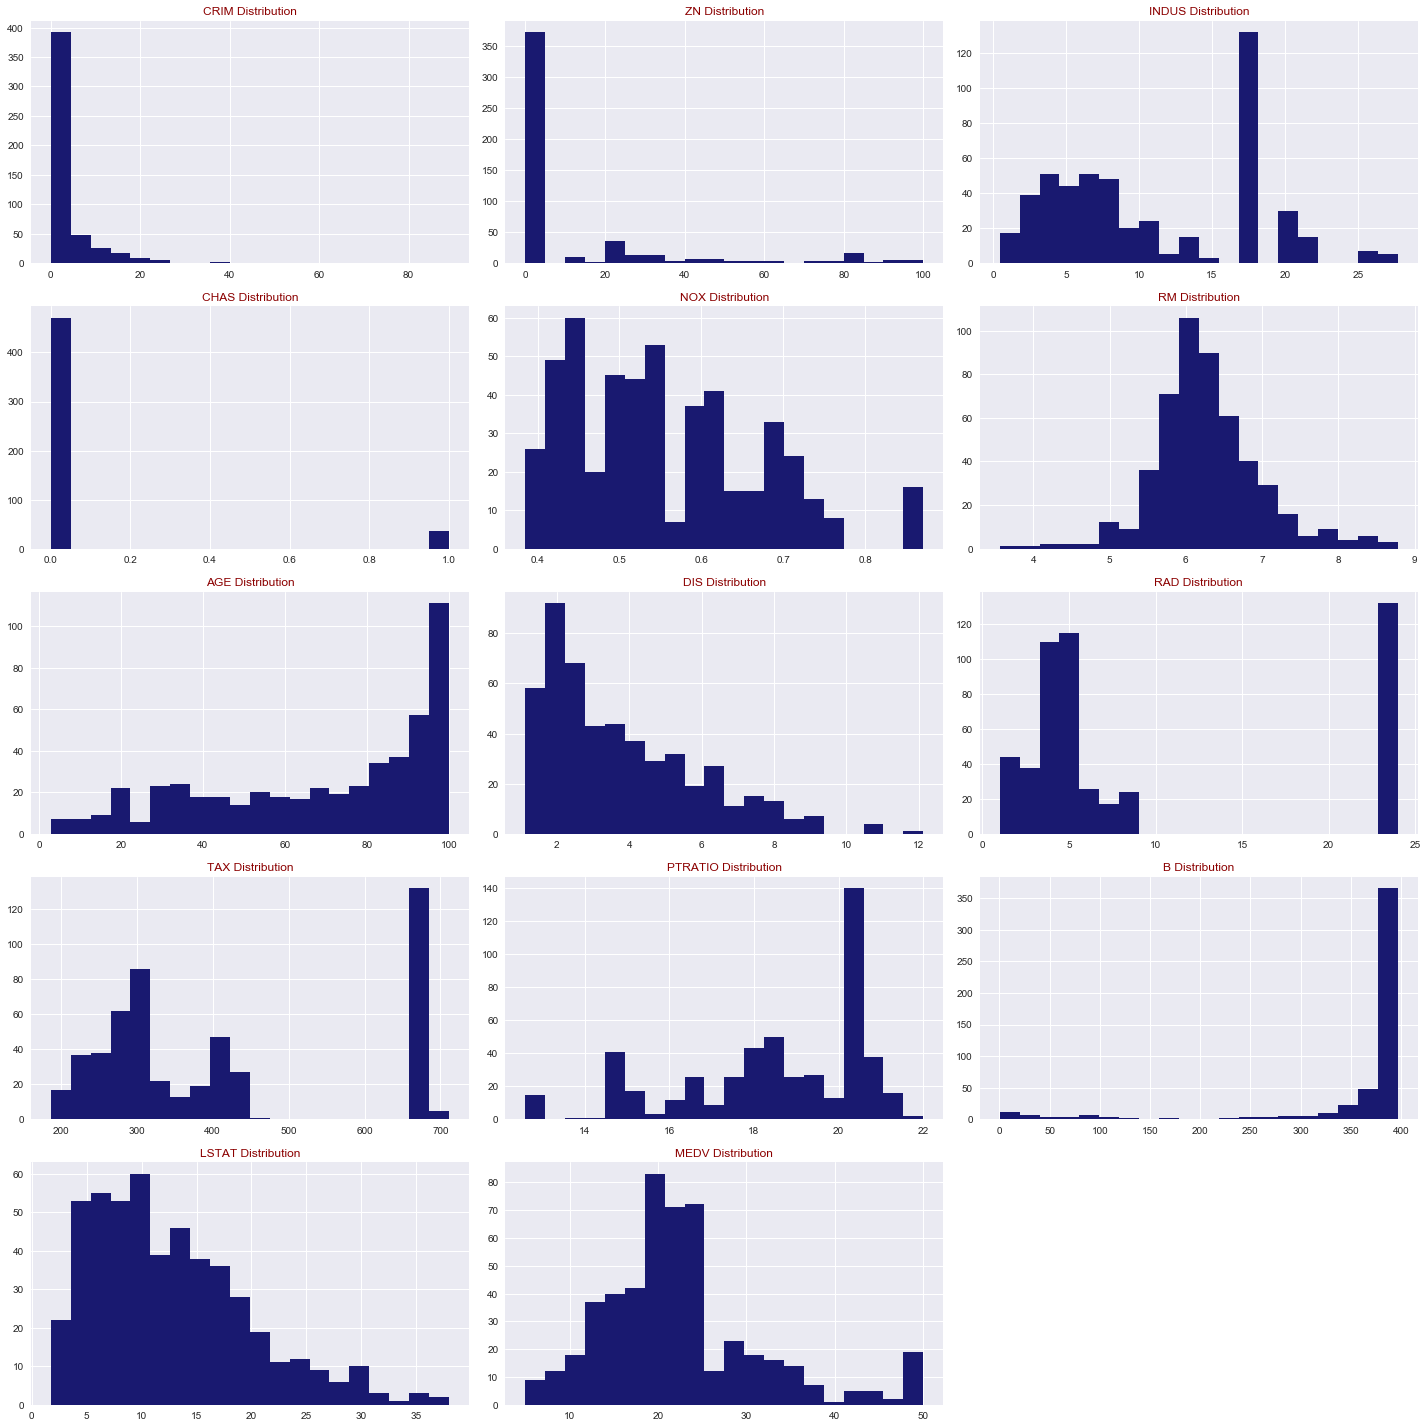

In [41]:
# Code taken from https://medium.com/datadriveninvestor/boston-house-cost-prediction-linear-regression-9a145effe597

def draw_histograms(df, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        df[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,5,3)

***

## Appendix 2: Scatterplots of Original Inputs measured against MEDV (Price)


#### A view of Each Variable against the Price to aid in eliminating variables not relevant to determining relationships or collerations

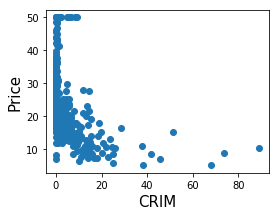

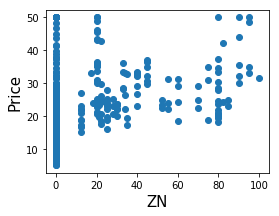

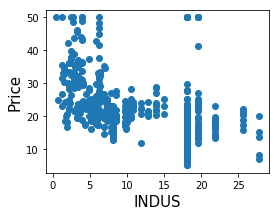

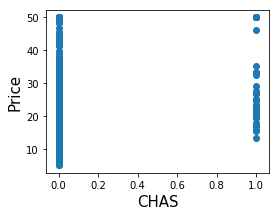

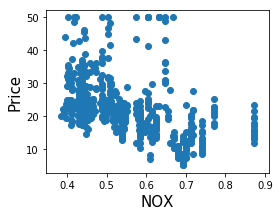

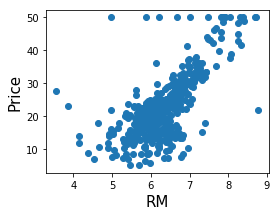

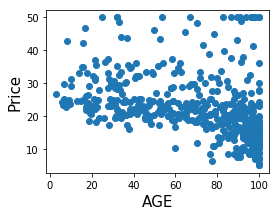

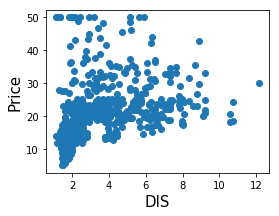

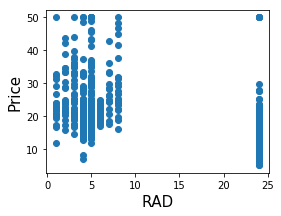

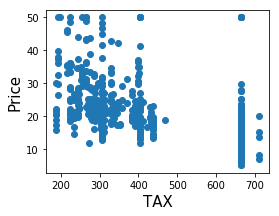

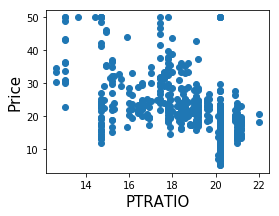

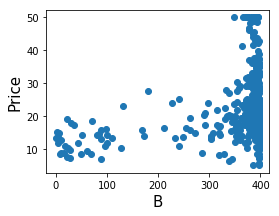

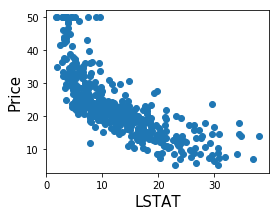

In [9]:
for index, feature_name in enumerate(boston_dataset.feature_names):
    plt.figure(figsize=(4, 3))
    plt.scatter(boston_dataset.data[:, index], boston_dataset.target)
    plt.ylabel('Price', size=15)
    plt.xlabel(feature_name, size=15)

## Referenced Sites

Dataset
+ https://archive.ics.uci.edu/ml/machine-learning-databases/housing/
+ https://www.kaggle.com/prasadperera/the-boston-housing-dataset
+ https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
+ https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

Regression
+ https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef 
+ https://gogul.dev/software/regression-example-boston-housing-prices
+ http://seaborn.pydata.org/generated/seaborn.regplot.html
+ https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155 
+ https://subscription.packtpub.com/book/programming/9781789804744/1/ch01lvl1sec11/our-first-analysis-the-boston-housing-dataset
+ https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f 
+ https://realpython.com/linear-regression-in-python/
+ https://seaborn.pydata.org/generated/seaborn.distplot.html

Correlation
+ https://pythonfordatascience.org/correlation-python/ 
+ https://www.surveysystem.com/correlation.htm. 
 
T-Test 
+ https://uk.sagepub.com/sites/default/files/upm-binaries/40006_Chapter1.pdf
+ https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php
+ https://stattrek.com/hypothesis-test/difference-in-means.aspx
+ https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php

Used in Neural Network build
+ https://hackernoon.com/build-your-first-neural-network-to-predict-house-prices-with-keras-3fb0839680f4
+ https://keras.io/getting-started/sequential-model-guide/
+ https://data-flair.training/blogs/python-ml-data-preprocessing/ 

+ Deep Learning With Python: Develop Deep Learning Models on Theano and TensorFlow Using Keras
Brownlee, J. 2016 Machine Learning Mastery